In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
from arch import arch_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

### 原始价格时间序列图

ADF统计量: -1.540436400008197
p值: 0.5134217108255927
临界值:
  1%: -3.432396452993246
  5%: -2.86244419883287
  10%: -2.567251325316284


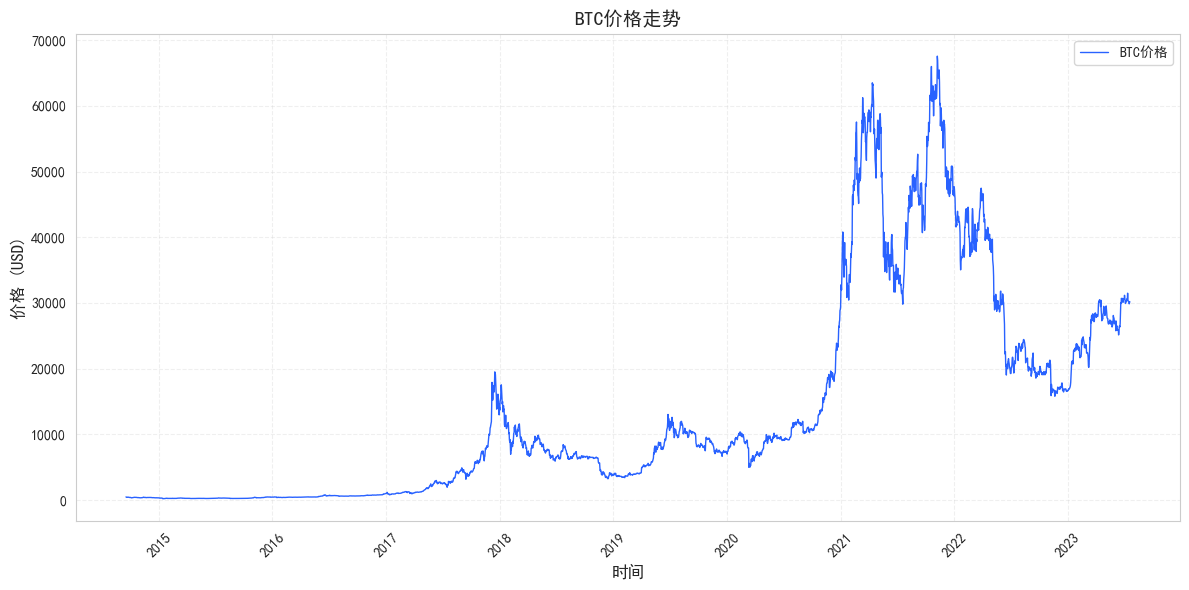

In [2]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 进行ADF检验
adf_result = adfuller(df['Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制价格线
plt.plot(df['Date'], df['Close'], color='#2962FF', linewidth=1, label='BTC价格')
# 设置标题和标签
plt.title('BTC价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC价格原始时间序列.png')
plt.show()


In [26]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10


### 对数时间序列图

ADF统计量: -0.9070918212007841
p值: 0.7856280083914862
临界值:
  1%: -3.432378047525015
  5%: -2.862436069383185
  10%: -2.5672469973560355


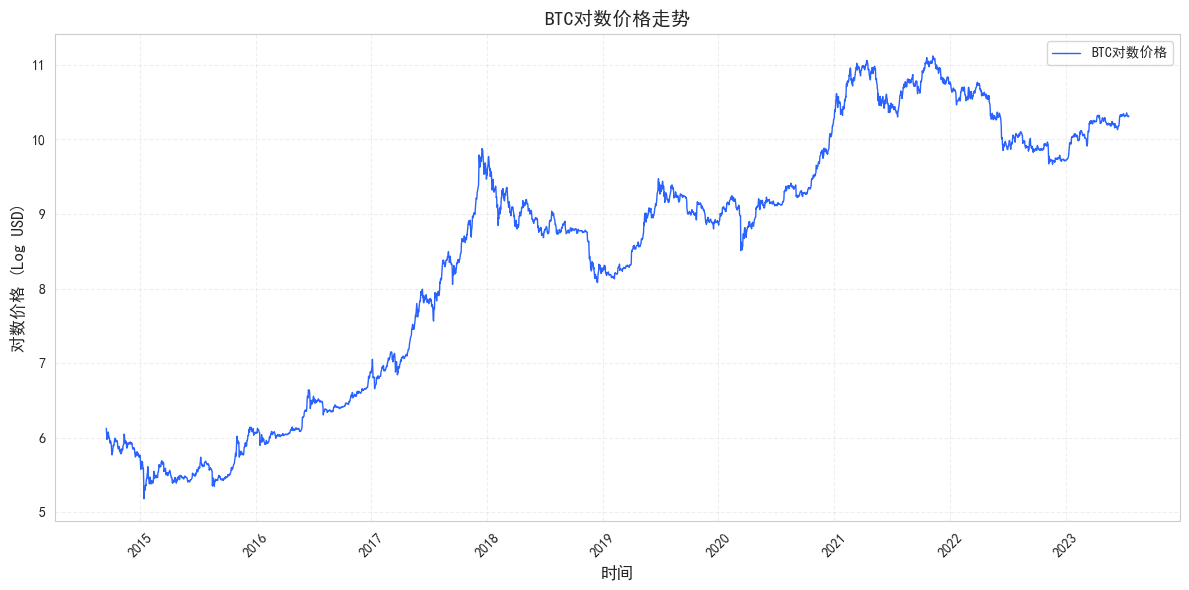

In [3]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 对价格取对数
df['Log_Close'] = np.log(df['Close'])

# 进行ADF检验
adf_result = adfuller(df['Log_Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制对数价格线
plt.plot(df['Date'], df['Log_Close'], color='#2962FF', linewidth=1, label='BTC对数价格')
# 设置标题和标签
plt.title('BTC对数价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('对数价格 (Log USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC对数价格时间序列.png')
plt.show()

In [28]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_Close
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03,3228.000000
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10,8.483919
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,5.182362
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08,6.638716
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10,8.948705
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10,9.918230
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,11.120872
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10,1.752911


无论原始价格序列差分与否，从p值判断（都大于0.05），所以都能得出，该序列绝对不平稳，所以需要进行差分处理。
我采取对原始时间序列进行差分，然后对白噪声进行检验

ADF Statistic: -9.515779426095047
p-value: 3.160120153308401e-16
Critical Values:
   1%: -3.432396452993246
   5%: -2.86244419883287
   10%: -2.567251325316284


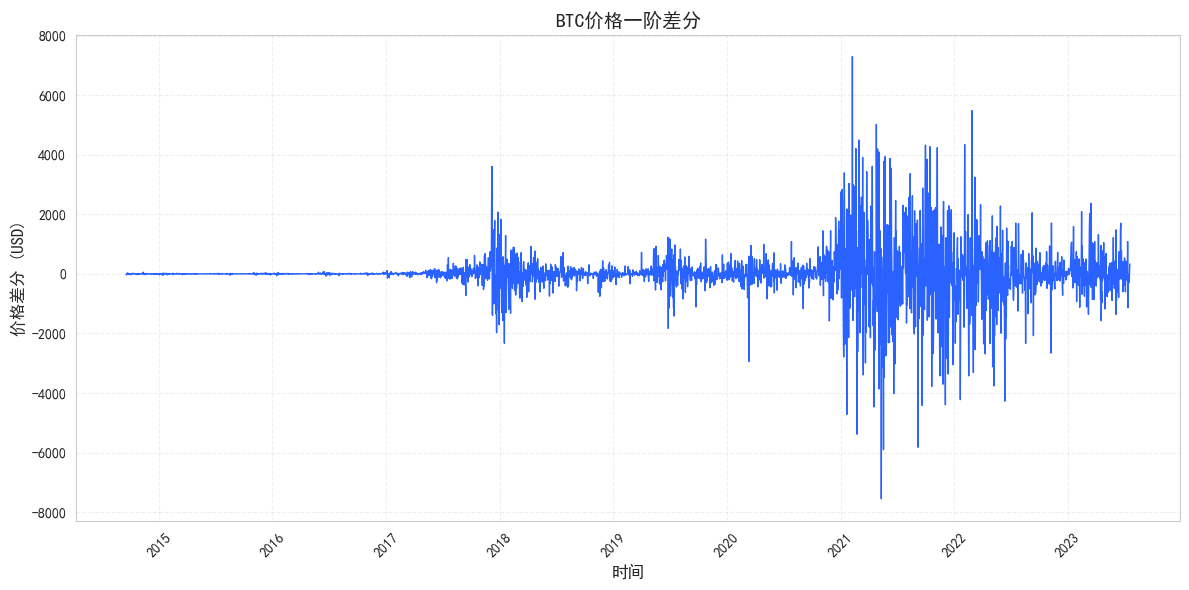

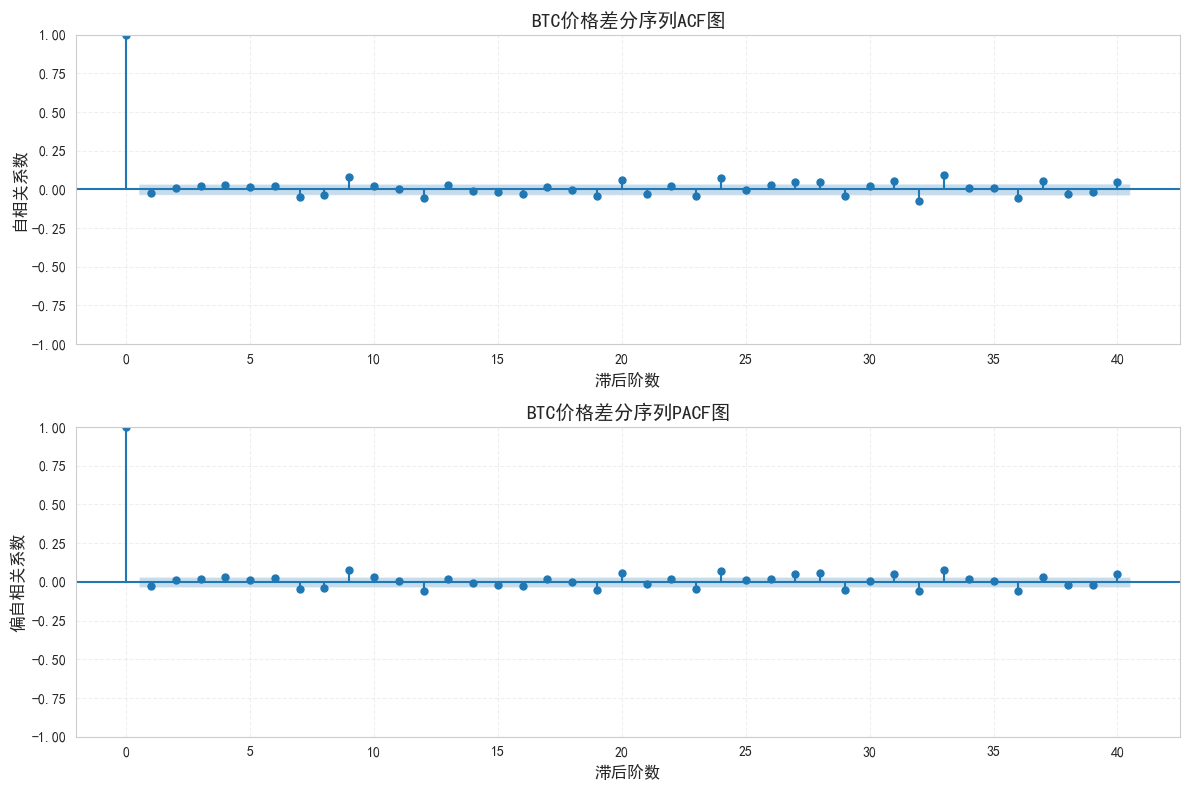

In [10]:
# 进行一阶差分
df['diff_price'] = df['Close'].diff()


# ADF检验，包含截距项
adf_result = adfuller(df['diff_price'].dropna(), regression='c')

# 打印ADF检验结果
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# 绘制差分后的图
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['diff_price'], color='#2962FF', linewidth=1)
plt.title('BTC价格一阶差分', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格差分 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('img/BTC价格一阶差分.png')
plt.show()

# 创建子图展示ACF和PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 绘制ACF图
plot_acf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax1)
ax1.set_title('BTC价格差分序列ACF图', fontsize=14)
ax1.set_xlabel('滞后阶数', fontsize=12)
ax1.set_ylabel('自相关系数', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# 绘制PACF图
plot_pacf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax2)
ax2.set_title('BTC价格差分序列PACF图', fontsize=14)
ax2.set_xlabel('滞后阶数', fontsize=12)
ax2.set_ylabel('偏自相关系数', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)

# 调整子图间距
plt.tight_layout()

# 保存图片
plt.savefig('img/BTC价格差分ACF_PACF图.png')
plt.show()

### 白噪声检验

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# 进行LB检验
lb_test = acorr_ljungbox(df['diff_price'].dropna(), lags=[5 ,10, 15, 20, 30], return_df=True)

# 打印检验结果
print("Ljung-Box白噪声检验结果：")
print("=" * 50)
print(lb_test)
print("\n检验结论：")
for idx, p_value in enumerate(lb_test['lb_pvalue']):
    lag = lb_test.index[idx]
    if p_value < 0.05:
        print(f"滞后{lag}阶：p值为{p_value:.4f} < 0.05，拒绝原假设，序列不是白噪声")
    else:
        print(f"滞后{lag}阶：p值为{p_value:.4f} > 0.05，不能拒绝原假设，序列可能是白噪声")

Ljung-Box白噪声检验结果：
       lb_stat     lb_pvalue
5     7.007393  2.200910e-01
10   44.079144  3.185648e-06
15   57.500986  6.746410e-07
20   78.631713  6.693740e-09
30  131.330756  1.219435e-14

检验结论：
滞后5阶：p值为0.2201 > 0.05，不能拒绝原假设，序列可能是白噪声
滞后10阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后15阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后20阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后30阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声


### 接下来进行模型构建与残差处理

#### ARIMA部分

开始ARIMA模型分析...
计算ESACF表...

ESACF表 (x: 显著相关, o: 不显著相关)
   MA阶数
AR     0   1   2   3   4   5   6   7   8   9  10  11  12
阶  ----------------------------------------------------
 0 |x   x   x   x   x   x   x   x   x   x   x   x   x   
 1 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 2 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 3 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 4 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 5 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 6 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 7 |o   o   o   o   o   o   x   x   x   o   o   x   o   

建议的ARIMA阶数:
ARIMA(1, 1, 0)
ARIMA(1, 1, 1)
ARIMA(1, 1, 2)
ARIMA(1, 1, 3)
ARIMA(1, 1, 4)

评估建议的模型...

ARIMA(1, 1, 0):
AIC: 52183.09
BIC: 52195.25
参数显著: 是

ARIMA(1, 1, 1):
AIC: 52185.01
BIC: 52203.25
参数显著: 否

ARIMA(1, 1, 2):
AIC: 52183.85
BIC: 52208.17
参数显著: 是

ARIMA(1, 1, 3):
AIC: 52184.83
BIC: 52215.23
参数显著: 否

ARIMA(1, 1, 4):
AIC: 52186.26
BIC: 52222.73
参数显著: 否

最优

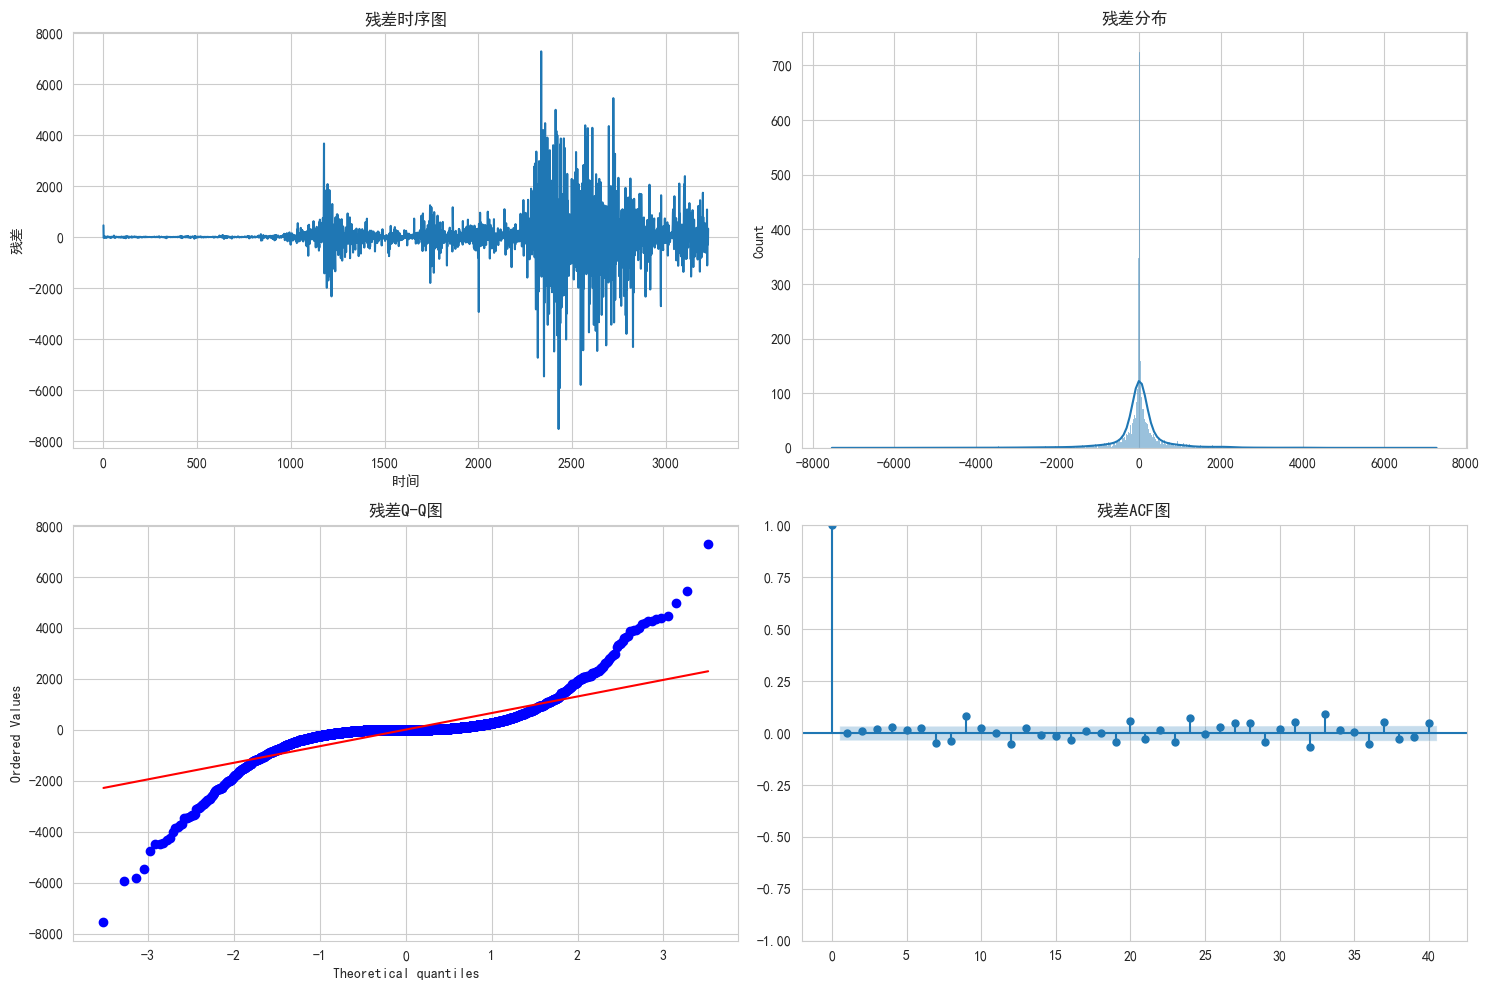


异方差性检验:
White检验p值: nan

ARCH效应检验:
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3507      0.293      1.195      0.232 [ -0.224,  0.926]

正态性检验:
Jarque-Bera检验p值: 0.0000
Shapiro-Wilk检验p值: 0.0000

检测到非正态性，使用Box-Cox转换...

Box-Cox转换使用的lambda值: 1.3090


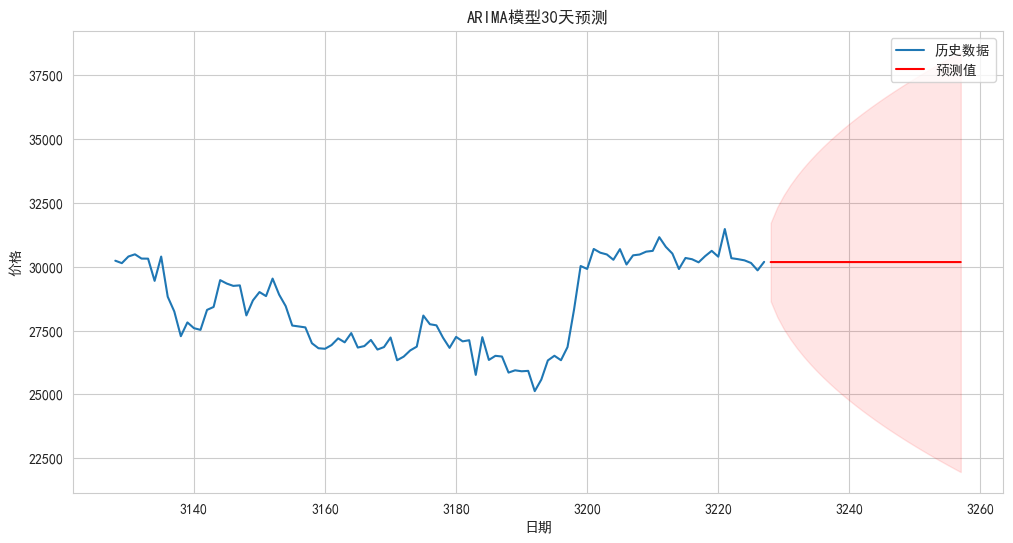

In [3]:
# 模型构建与残差处理
# 导入自定义的分析器类
from ARIMAAnalyzerWithESACF import ARIMAAnalyzerWithESACF
from ResidualAnalyzer import ResidualAnalyzer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1. ARIMA分析
print("开始ARIMA模型分析...")
arima_analyzer = ARIMAAnalyzerWithESACF()
ESACF_matrix = arima_analyzer.compute_ESACF(df['Close'])
arima_analyzer.print_ESACF_table(ESACF_matrix)
suggested_orders = arima_analyzer.suggest_orders(ESACF_matrix)

print("\n建议的ARIMA阶数:")
for order in suggested_orders:
    print(f"ARIMA{order}")

# 2. 拟合最优模型
best_model = None
best_aic = float('inf')
best_params = None

print("\n评估建议的模型...")
for order in suggested_orders:
    try:
        # 拟合模型
        model = ARIMA(df['Close'], order=order)
        results = model.fit()

        # 检查参数显著性
        significant = all(p_value < 0.05 for p_value in results.pvalues)

        print(f"\nARIMA{order}:")
        print(f"AIC: {results.aic:.2f}")
        print(f"BIC: {results.bic:.2f}")
        print(f"参数显著: {'是' if significant else '否'}")

        if results.aic < best_aic and significant:
            best_aic = results.aic
            best_model = results
            best_params = order

    except Exception as e:
        print(f"ARIMA{order} 拟合失败: {str(e)}")
        continue

if best_model is not None:
    print("\n最优模型:")
    print(f"ARIMA{best_params}")
    print(best_model.summary())

    # 预测误差评估
    actual_values = df['Close'][-30:]
    forecast = best_model.get_forecast(steps=30)
    forecast_mean = forecast.predicted_mean

    # 计算预测误差指标
    mse = mean_squared_error(actual_values, forecast_mean)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_values, forecast_mean)
    mape = np.mean(np.abs((actual_values - forecast_mean) / actual_values)) * 100

    print('\nARIMA预测误差评估指标:')
    print(f'MSE (均方误差): {mse:.2f}')
    print(f'RMSE (均方根误差): {rmse:.2f}')
    print(f'MAE (平均绝对误差): {mae:.2f}')
    print(f'MAPE (平均绝对百分比误差): {mape:.2f}%')

    # 3. 残差分析
    print("\n开始残差分析...")
    resid_analyzer = ResidualAnalyzer(best_model, df['Close'])

    # 绘制残差诊断图
    resid_analyzer.plot_residual_diagnostics()

    # 检查异方差性和正态性
    has_heteroskedasticity = resid_analyzer.check_heteroskedasticity()
    non_normal = resid_analyzer.check_normality()

    # 处理残差（如果需要）
    if has_heteroskedasticity:
        print("\n检测到异方差性，使用GARCH模型处理...")
        standardized_resid = resid_analyzer.apply_garch()

    if non_normal:
        print("\n检测到非正态性，使用Box-Cox转换...")
        transformed_resid = resid_analyzer.box_cox_transform()

    # 保存预测结果图
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
    plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red')
    forecast_ci = forecast.conf_int()
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('ARIMA模型30天预测')
    plt.xlabel('日期')
    plt.ylabel('价格')
    plt.legend()
    plt.grid(True)
    plt.savefig('img/ARIMA预测结果.png')
    plt.show()

else:
    print("未找到合适的模型")

#### SARIMA

开始SARIMA模型选择...
季节性周期: 14天(双周)、30天(月)

最优SARIMA模型:
SARIMA(0, 1, 1)x(0, 1, 1, 30)

模型摘要:
                                     SARIMAX Results                                      
Dep. Variable:                           LogClose   No. Observations:                 3228
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood                5804.037
Date:                            Sat, 09 Nov 2024   AIC                         -11602.073
Time:                                    01:02:25   BIC                         -11583.893
Sample:                                         0   HQIC                        -11595.552
                                           - 3228                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0181     

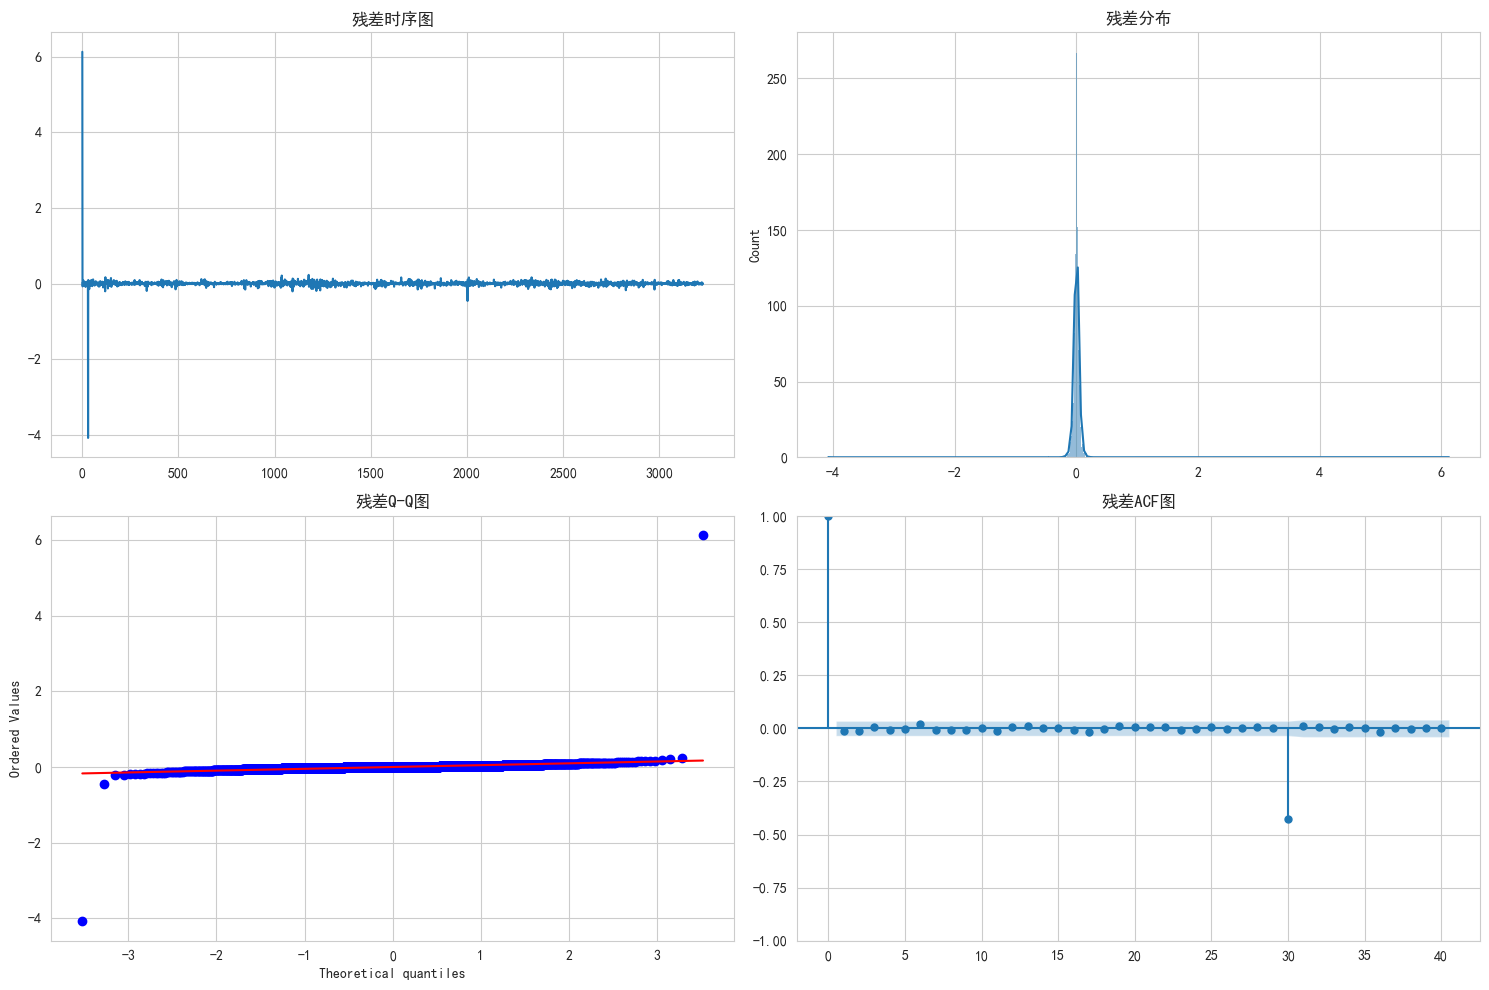


残差诊断检验:

Ljung-Box检验:
       lb_stat      lb_pvalue
10    3.255997   9.747416e-01
15    4.250372   9.967950e-01
20    5.487744   9.994334e-01
30  597.257054  1.095183e-106

Jarque-Bera检验 p值: 0.0000

ARCH效应检验:
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.8607e-04  3.904e-04      2.526  1.154e-02 [2.209e-04,1.751e-03]

预测误差评估指标:
MSE (均方误差): 413230.63
RMSE (均方根误差): 642.83
MAE (平均绝对误差): 501.24
MAPE (平均绝对百分比误差): nan%


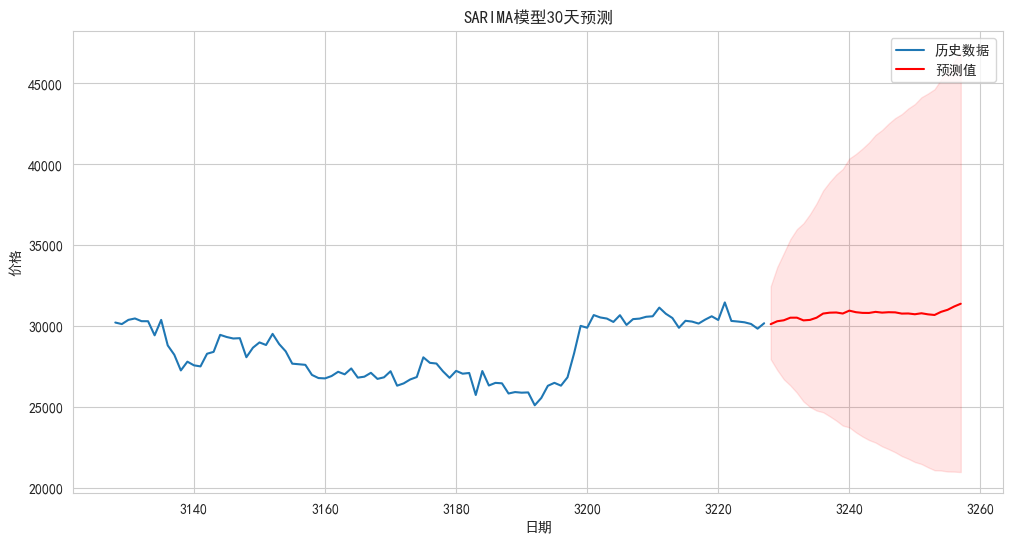


检测到ARCH效应，开始SARIMA-GARCH建模...

尝试拟合EGARCH模型...
EGARCH模型拟合成功!

EGARCH建模失败，错误信息: unsupported operand type(s) for +: 'int' and 'Timedelta'

切换到标准GARCH(1,1)模型...
GARCH(1,1)模型拟合成功!

GARCH模型摘要:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5141.16
Distribution:                  Normal   AIC:                          -10274.3
Method:            Maximum Likelihood   BIC:                          -10250.0
                                        No. Observations:                 3228
Date:                Sat, Nov 09 2024   Df Residuals:                     3227
Time:                        01:02:28   Df Model:                            1
                                 Mean Model                                 
                 coef  

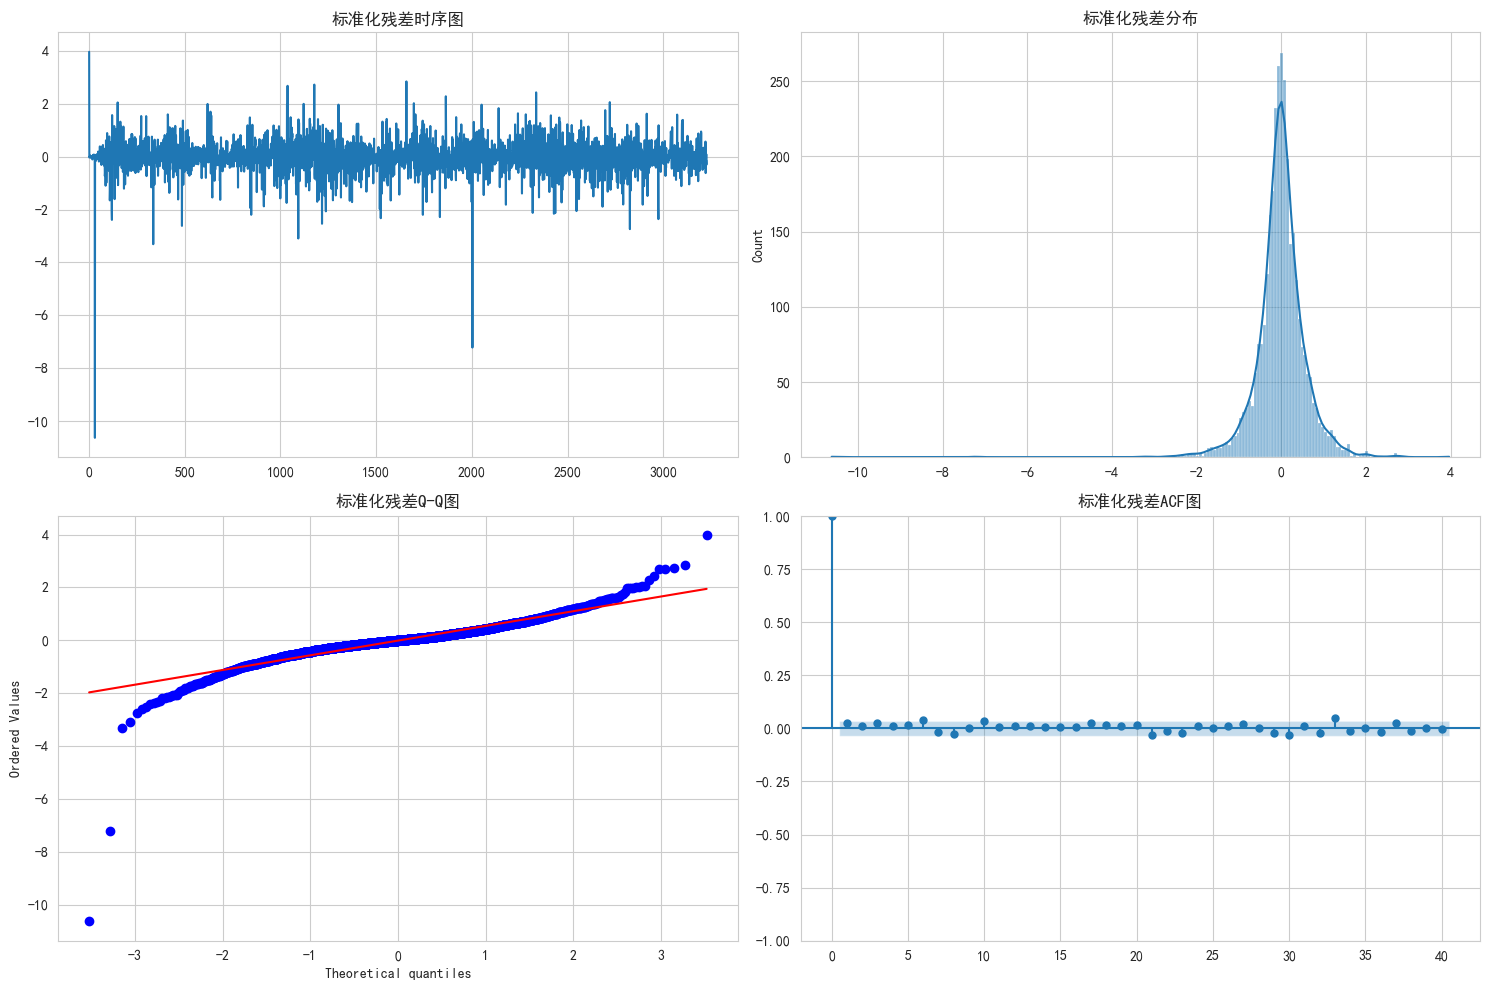


SARIMA-GARCH组合模型残差诊断:

Ljung-Box检验 (标准化残差):
      lb_stat  lb_pvalue
10  17.365789   0.066652
15  18.514205   0.236597
20  23.495864   0.265107
30  35.469532   0.225958

Jarque-Bera检验 p值 (标准化残差): 0.0000

Ljung-Box检验 (标准化残差平方):
      lb_stat  lb_pvalue
10   0.464488   0.999995
15   0.591965   1.000000
20   0.805221   1.000000
30  34.053520   0.278698


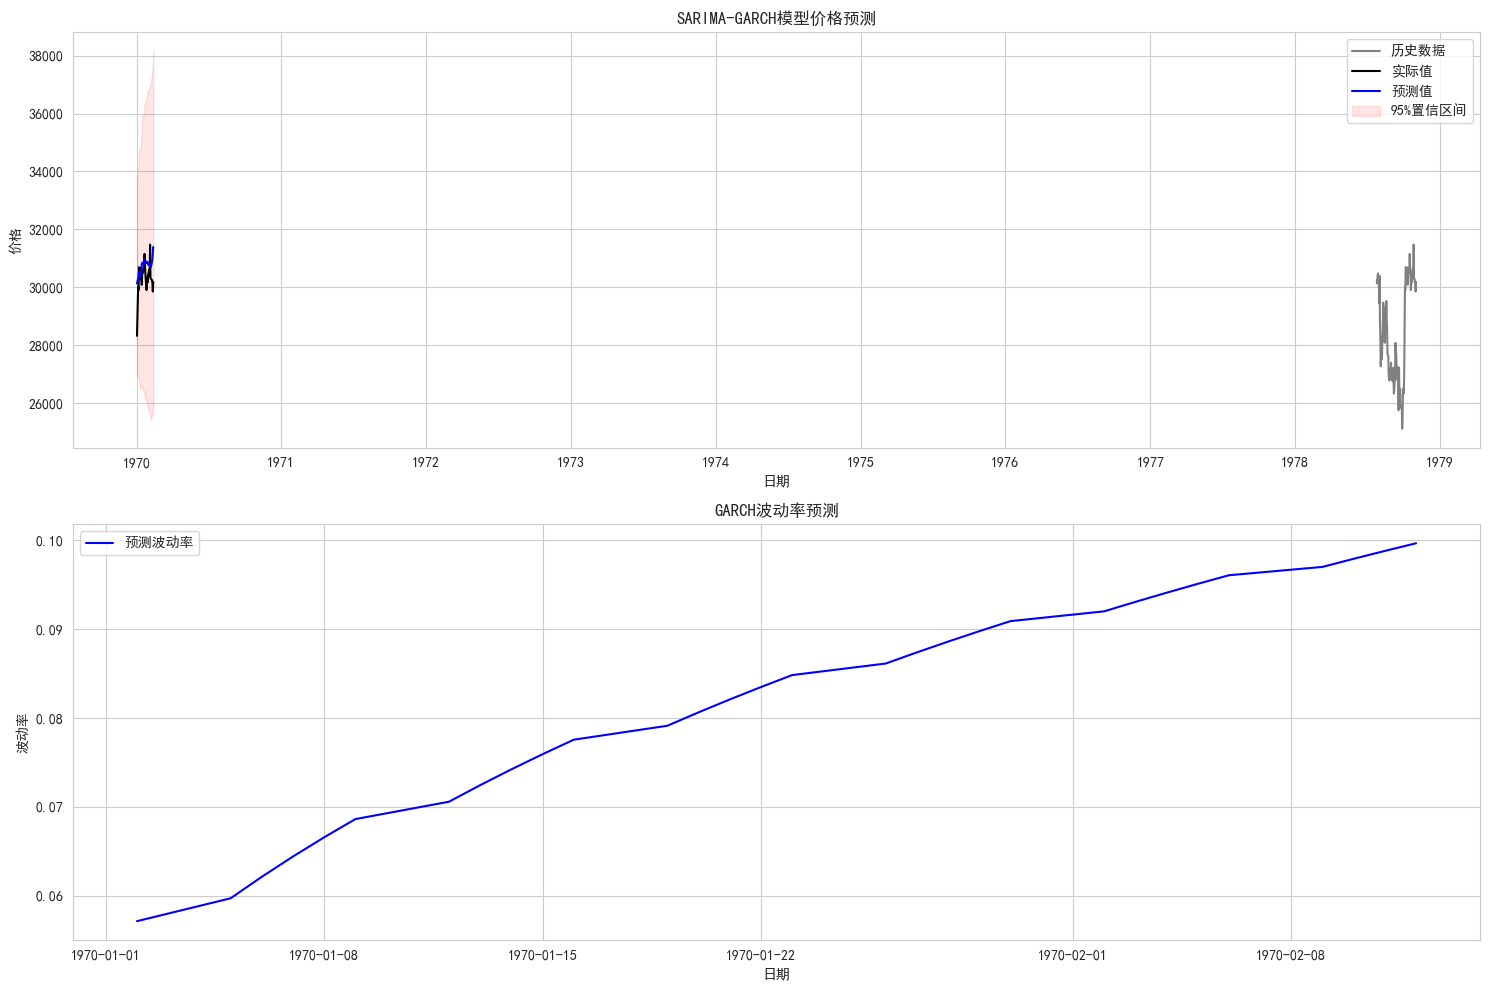


风险评估指标:
平均预测波动率: 0.0822
最大预测波动率: 0.0996
95% VaR (平均): -4571.9971
95% ES (平均): -4791.5517

SARIMA预测精度评估:
MSE (均方误差): 413230.6347
RMSE (均方根误差): 642.8302
MAE (平均绝对误差): 501.2388
MAPE (平均绝对百分比误差): 1.6686%
调整R方: -0.6744
Theil's U统计量: 0.8057
方向预测准确率: 55.17%
DM检验 p值: 0.8157

SARIMA-GARCH预测精度评估:
MSE (均方误差): 518660.2953
RMSE (均方根误差): 720.1807
MAE (平均绝对误差): 576.5680
MAPE (平均绝对百分比误差): 1.9186%
调整R方: -1.1016
Theil's U统计量: 0.8031
方向预测准确率: 55.17%
DM检验 p值: 0.3878


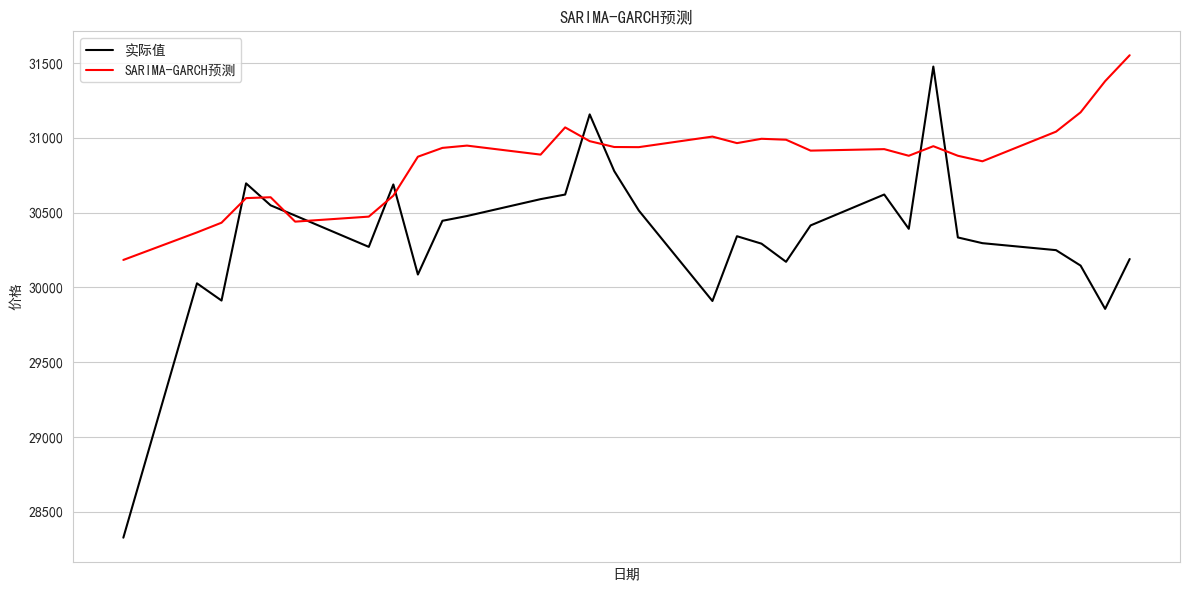


在执行GARCH模型分析过程中出现错误: array length 30 does not match index length 60
请检查数据和模型设置。


In [17]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import scipy.stats as stats
import numpy as np
import pandas as pd
import itertools
%matplotlib inline

# 转换价格为对数价格
df['LogClose'] = np.log(df['Close'])

# 定义季节性周期
seasonal_periods = [14, 30]  # 周、双周、月度

# 定义SARIMA参数范围
p = d = q = range(0, 2)
P = D = Q = range(0, 2)

best_model = None
best_aic = np.inf
best_params = None
best_season = None

print("开始SARIMA模型选择...")
print("季节性周期: 14天(双周)、30天(月)")
'''
# 对每个季节性周期进行网格搜索
for s in seasonal_periods:
    print(f"\n测试季节性周期 {s} 天...")

    # 创建参数组合
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q))

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                # 构建完整的季节性参数
                seasonal_order = param_seasonal + (s,)

                # 拟合模型
                model = SARIMAX(df['LogClose'],  # 使用对数价格
                                order=param,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

                results = model.fit(disp=False)

                # 检查参数显著性
                significant = all(p_value < 0.05 for p_value in results.pvalues)

                if results.aic < best_aic and significant:
                    best_aic = results.aic
                    best_model = results
                    best_params = param
                    best_season = seasonal_order

                print(f'SARIMA{param}x{seasonal_order} - AIC:{results.aic:.2f}, 参数显著:{significant}')

            except Exception as e:
                continue
'''
# 直接指定SARIMA模型参数
order = (0, 1, 1)           # 非季节性部分 (p,d,q)
seasonal_order = (0, 1, 1, 30)  # 季节性部分 (P,D,Q,s)

# 构建并拟合模型
model = SARIMAX(df['LogClose'],  # 使用对数价格
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

best_model = model.fit(disp=False)
# 更新最优参数
best_params = order
best_season = seasonal_order

if best_model is not None:
    print('\n最优SARIMA模型:')
    print(f'SARIMA{best_params}x{best_season}')
    print('\n模型摘要:')
    print(best_model.summary())

    # 残差分析
    resid = best_model.resid

    # 1. 绘制残差诊断图
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # 残差时序图
    ax1.plot(resid)
    ax1.set_title('残差时序图')

    # 残差直方图
    sns.histplot(resid, kde=True, ax=ax2)
    ax2.set_title('残差分布')

    # Q-Q图
    stats.probplot(resid, dist="norm", plot=ax3)
    ax3.set_title('残差Q-Q图')

    # ACF图
    plot_acf(resid, ax=ax4, lags=40)
    ax4.set_title('残差ACF图')

    plt.tight_layout()
    plt.savefig('img/ARIMA残差分析.png')
    plt.show()

    # 2. 进行诊断检验
    print('\n残差诊断检验:')

    # Ljung-Box检验
    lb_test = acorr_ljungbox(resid, lags=[10, 15, 20, 30])
    print("\nLjung-Box检验:")
    print(lb_test)

    # Jarque-Bera检验
    jb_test = stats.jarque_bera(resid)
    print(f"\nJarque-Bera检验 p值: {jb_test[1]:.4f}")

    # ARCH效应检验
    arch_model_test = arch_model(resid)
    arch_result = arch_model_test.fit(disp='off')
    print("\nARCH效应检验:")
    print(arch_result.summary().tables[1])

    # 3. 模型预测
    forecast = best_model.get_forecast(steps=30)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # 将对数预测转换回原始价格尺度
    forecast_mean = np.exp(forecast_mean)
    forecast_ci = np.exp(forecast_ci)

    actual_values = df['Close'][-30:]  # 使用原始价格进行评估

    # 计算预测误差指标
    mse = mean_squared_error(actual_values, forecast_mean)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_values, forecast_mean)
    mape = np.mean(np.abs((actual_values - forecast_mean) / actual_values)) * 100

    print('\n预测误差评估指标:')
    print(f'MSE (均方误差): {mse:.2f}')
    print(f'RMSE (均方根误差): {rmse:.2f}')
    print(f'MAE (平均绝对误差): {mae:.2f}')
    print(f'MAPE (平均绝对百分比误差): {mape:.2f}%')

    # 绘制预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
    plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red')
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('SARIMA模型30天预测')
    plt.xlabel('日期')
    plt.ylabel('价格')
    plt.legend()
    plt.grid(True)
    plt.savefig('img/SARIMA预测结果.png')
    plt.show()

# SARIMA-GARCH组合建模部分
if arch_result.pvalues[-1] < 0.05:  # 检查是否存在ARCH效应
    print("\n检测到ARCH效应，开始SARIMA-GARCH建模...")

    try:
        # 首先尝试EGARCH模型
        print("\n尝试拟合EGARCH模型...")
        egarch_model = arch_model(resid,
                                  vol='EGARCH',
                                  p=1,
                                  o=1,
                                  q=1,
                                  dist='skewt',
                                  rescale=True)

        # 拟合EGARCH模型
        garch_results = egarch_model.fit(disp='off', update_freq=0)
        model_type = "EGARCH"
        print("EGARCH模型拟合成功!")

        # 预测准备
        last_date = df.index[-1]
        forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')
        actual_values = df['Close'].asof(forecast_dates)

        # SARIMA预测
        forecast = best_model.get_forecast(steps=30)
        forecast_mean = np.exp(forecast.predicted_mean)

        # EGARCH波动率预测
        garch_forecast = garch_results.forecast(horizon=30, method='simulation', simulations=1000)
        volatility_forecast = np.sqrt(garch_forecast.variance.mean(axis=1))[-30:]

        # 确保数据长度匹配
        min_len = min(len(forecast_mean), len(volatility_forecast), len(actual_values))
        forecast_mean = forecast_mean[:min_len]
        volatility_forecast = volatility_forecast[:min_len]
        actual_values = actual_values[:min_len]
        forecast_dates = forecast_dates[:min_len]

        # 计算考虑波动率的SARIMA-EGARCH预测
        combined_forecast = forecast_mean * np.exp(0.5 * volatility_forecast**2)

    except Exception as e:
        print(f"\nEGARCH建模失败，错误信息: {str(e)}")
        print("\n切换到标准GARCH(1,1)模型...")

        # 使用标准GARCH(1,1)作为备选
        garch_model = arch_model(resid,
                                 vol='GARCH',
                                 p=1,
                                 q=1)
        garch_results = garch_model.fit(disp='off')
        model_type = "GARCH"
        print("GARCH(1,1)模型拟合成功!")

    try:
        # 打印模型摘要
        print(f"\n{model_type}模型摘要:")
        print(garch_results.summary())

        # 模型诊断统计量
        print("\n模型诊断统计量:")
        print(f"AIC: {garch_results.aic:.2f}")
        print(f"BIC: {garch_results.bic:.2f}")
        print(f"对数似然值: {garch_results.loglikelihood:.2f}")

        # 获取标准化残差
        std_resid = garch_results.resid / garch_results.conditional_volatility

        # 组合模型残差分析图
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # 标准化残差时序图
        ax1.plot(std_resid)
        ax1.set_title('标准化残差时序图')
        ax1.grid(True)

        # 标准化残差直方图
        sns.histplot(std_resid, kde=True, ax=ax2)
        ax2.set_title('标准化残差分布')

        # 标准化残差Q-Q图
        stats.probplot(std_resid, dist="norm", plot=ax3)
        ax3.set_title('标准化残差Q-Q图')

        # 标准化残差ACF图
        plot_acf(std_resid, ax=ax4, lags=40)
        ax4.set_title('标准化残差ACF图')

        plt.tight_layout()
        plt.savefig(f'img/SARIMA-{model_type}残差分析.png')
        plt.show()

        # 进行组合模型的诊断检验
        print(f'\nSARIMA-{model_type}组合模型残差诊断:')

        # Ljung-Box检验
        lb_test = acorr_ljungbox(std_resid, lags=[10, 15, 20, 30])
        print("\nLjung-Box检验 (标准化残差):")
        print(lb_test)

        # Jarque-Bera检验
        jb_test = stats.jarque_bera(std_resid)
        print(f"\nJarque-Bera检验 p值 (标准化残差): {jb_test[1]:.4f}")

        # 标准化残差平方的Ljung-Box检验
        lb_test_sq = acorr_ljungbox(std_resid**2, lags=[10, 15, 20, 30])
        print("\nLjung-Box检验 (标准化残差平方):")
        print(lb_test_sq)

        # 计算置信区间
        q = stats.norm.ppf(0.975)
        log_forecast_mean = np.log(forecast_mean)
        forecast_ci_lower = np.exp(log_forecast_mean - q * volatility_forecast)
        forecast_ci_upper = np.exp(log_forecast_mean + q * volatility_forecast)

        # 绘制预测结果
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        # 价格预测图
        ax1.plot(df.index[-100:], df['Close'][-100:], label='历史数据', color='gray')
        ax1.plot(forecast_dates, actual_values, label='实际值', color='black')
        ax1.plot(forecast_dates, forecast_mean, label='预测值', color='blue')
        ax1.fill_between(forecast_dates,
                         forecast_ci_lower,
                         forecast_ci_upper,
                         color='red', alpha=0.1, label='95%置信区间')
        ax1.set_title(f'SARIMA-{model_type}模型价格预测')
        ax1.set_xlabel('日期')
        ax1.set_ylabel('价格')
        ax1.legend()
        ax1.grid(True)

        # 波动率预测图
        ax2.plot(forecast_dates, volatility_forecast, color='blue', label='预测波动率')
        ax2.set_title(f'{model_type}波动率预测')
        ax2.set_xlabel('日期')
        ax2.set_ylabel('波动率')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.savefig(f'img/SARIMA-{model_type}预测结果.png')
        plt.show()

        # 风险指标计算
        var_95 = -q * volatility_forecast
        es_95 = -(stats.norm.pdf(stats.norm.ppf(0.05)) * volatility_forecast) / 0.05

        # 将风险指标转换为原始价格尺度
        var_95_price = forecast_mean * (np.exp(var_95) - 1)
        es_95_price = forecast_mean * (np.exp(es_95) - 1)

        print('\n风险评估指标:')
        print(f'平均预测波动率: {np.mean(volatility_forecast):.4f}')
        print(f'最大预测波动率: {np.max(volatility_forecast):.4f}')
        print(f'95% VaR (平均): {np.mean(var_95_price):.4f}')
        print(f'95% ES (平均): {np.mean(es_95_price):.4f}')

        def evaluate_forecast_accuracy(actual, forecast, model_name=""):
            """评估预测精度的函数"""
            # 确保数据类型和长度匹配
            actual = np.array(actual)
            forecast = np.array(forecast)

            # 确保长度匹配
            min_len = min(len(actual), len(forecast))
            actual = actual[:min_len]
            forecast = forecast[:min_len]

            # 基本误差指标
            mse = mean_squared_error(actual, forecast)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(actual, forecast)
            mape = np.mean(np.abs((actual - forecast) / actual)) * 100

            # 计算调整R方
            ss_tot = np.sum((actual - np.mean(actual)) ** 2)
            ss_res = np.sum((actual - forecast) ** 2)
            r2 = 1 - (ss_res / ss_tot)
            adj_r2 = 1 - (1 - r2) * (len(actual) - 1) / (len(actual) - 2)

            # Theil's U统计量
            changes_actual = np.diff(actual)
            changes_forecast = np.diff(forecast)
            num = np.sqrt(np.mean((changes_actual - changes_forecast) ** 2))
            den = np.sqrt(np.mean(changes_actual ** 2)) + np.sqrt(np.mean(changes_forecast ** 2))
            theil_u = num / den if den != 0 else np.inf

            # 方向预测准确率
            direction_actual = np.sign(changes_actual)
            direction_forecast = np.sign(changes_forecast)
            direction_accuracy = np.mean(direction_actual == direction_forecast) * 100

            # DM检验统计量
            loss_diff = (actual[1:] - forecast[1:]) ** 2 - (actual[1:] - np.roll(actual, 1)[1:]) ** 2
            dm_stat = np.mean(loss_diff) / (np.std(loss_diff) / np.sqrt(len(loss_diff)))
            dm_pvalue = 2 * (1 - stats.norm.cdf(abs(dm_stat)))

            print(f"\n{model_name}预测精度评估:")
            print(f"MSE (均方误差): {mse:.4f}")
            print(f"RMSE (均方根误差): {rmse:.4f}")
            print(f"MAE (平均绝对误差): {mae:.4f}")
            print(f"MAPE (平均绝对百分比误差): {mape:.4f}%")
            print(f"调整R方: {adj_r2:.4f}")
            print(f"Theil's U统计量: {theil_u:.4f}")
            print(f"方向预测准确率: {direction_accuracy:.2f}%")
            print(f"DM检验 p值: {dm_pvalue:.4f}")

            return {
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'mape': mape,
                'adj_r2': adj_r2,
                'theil_u': theil_u,
                'direction_accuracy': direction_accuracy,
                'dm_pvalue': dm_pvalue
            }

        # 评估预测精度
        # 评估SARIMA预测
        sarima_metrics = evaluate_forecast_accuracy(
            actual_values,
            forecast_mean,
            "SARIMA"
        )

        # 评估SARIMA-GARCH组合预测
        combined_metrics = evaluate_forecast_accuracy(
            actual_values,
            combined_forecast,
            f"SARIMA-{model_type}"
        )

        # 预测比较可视化
        plt.figure(figsize=(12, 6))
        plt.plot(forecast_dates, actual_values, label='实际值', color='black')
        plt.plot(forecast_dates, combined_forecast, label=f'SARIMA-{model_type}预测', color='red')
        plt.title('SARIMA-GARCH预测')
        plt.xlabel('日期')
        plt.ylabel('价格')
        plt.legend()
        plt.grid(True)
        
        # 隐藏横坐标标签
        plt.xticks([])  # 直接将 xticks 设置为空列表来隐藏横坐标
        
        plt.tight_layout()
        plt.savefig('img/SARIMA-GARCH预测.png')
        plt.show()


# 保存预测结果
        forecast_results = pd.DataFrame({
            'Date': forecast_dates,
            'Actual_Price': actual_values,
            'SARIMA_Forecast': forecast_mean,
            'CI_Lower': forecast_ci_lower,
            'CI_Upper': forecast_ci_upper,
            'Predicted_Volatility': volatility_forecast,
            'VaR_95': var_95_price,
            'ES_95': es_95_price,
            f'SARIMA-{model_type}_Forecast': combined_forecast
        })

        forecast_results.to_csv(f'forecast_results_{model_type.lower()}.csv')

    except Exception as e:
        print(f"\n在执行{model_type}模型分析过程中出现错误: {str(e)}")
        print("请检查数据和模型设置。")

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from typing import Tuple, Dict, Optional
from dataclasses import dataclass
from arch import arch_model
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import seaborn as sns

@dataclass
class HybridPrediction:
    """混合预测结果数据类"""
    mean: np.ndarray
    volatility: np.ndarray
    lower_bound: np.ndarray
    upper_bound: np.ndarray
    attention_weights: Optional[np.ndarray] = None

class OptimizedLSTM(nn.Module):
    """优化后的LSTM模型"""
    def __init__(self, params: Dict):
        super(OptimizedLSTM, self).__init__()
        self.hidden_size = params['hidden_size']
        self.num_layers = params['num_layers']

        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            batch_first=True,
            dropout=params['dropout']
        )

        self.attention = nn.Sequential(
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.Tanh(),
            nn.Linear(self.hidden_size, 1),
            nn.Softmax(dim=1)
        )

        self.fc = nn.Sequential(
            nn.Linear(self.hidden_size, self.hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(params['dropout']),
            nn.Linear(self.hidden_size // 2, 1)
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = self.attention(lstm_out)
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)
        out = self.fc(context_vector)
        return out, attention_weights

class ModifiedBTCLSTMHandler:
    def __init__(self, sequence_length=60, batch_size=32, hidden_size=100,
                 num_layers=3, dropout=0.3):
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

    def create_sequences(self, data: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """创建时间序列序列"""
        X, y = [], []
        for i in range(len(data) - self.sequence_length):
            X.append(data[i:(i + self.sequence_length)])
            y.append(data[i + self.sequence_length])
        return np.array(X), np.array(y)

    def prepare_data(self, df: pd.DataFrame) -> Tuple[DataLoader, DataLoader, pd.DataFrame]:
        """准备训练和测试数据"""
        data = self.scaler.fit_transform(df[['Close']].values)
        X, y = self.create_sequences(data)

        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        X_train = torch.FloatTensor(X_train).to(self.device)
        y_train = torch.FloatTensor(y_train).to(self.device)
        X_test = torch.FloatTensor(X_test).to(self.device)
        y_test = torch.FloatTensor(y_test).to(self.device)

        train_data = TensorDataset(X_train, y_train)
        test_data = TensorDataset(X_test, y_test)

        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=self.batch_size, shuffle=False)

        return train_loader, test_loader, df[-len(X_test):]

    def train(self, train_loader: DataLoader, epochs: int = 100) -> list:
        """训练模型"""
        self.model = OptimizedLSTM({
            'hidden_size': self.hidden_size,
            'num_layers': self.num_layers,
            'dropout': self.dropout
        }).to(self.device)

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)

        train_losses = []
        for epoch in range(epochs):
            self.model.train()
            total_loss = 0
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_pred, _ = self.model(X_batch)
                loss = criterion(y_pred, y_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            avg_loss = total_loss / len(train_loader)
            train_losses.append(avg_loss)
            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}')

        return train_losses

    def evaluate(self, test_loader: DataLoader) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
        """评估模型"""
        self.model.eval()
        predictions = []
        actuals = []
        attention_weights_list = []

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                y_pred, attn_weights = self.model(X_batch)
                predictions.extend(y_pred.cpu().numpy())
                actuals.extend(y_batch.cpu().numpy())
                attention_weights_list.extend(attn_weights.cpu().numpy())

        predictions = np.array(predictions)
        actuals = np.array(actuals)
        attention_weights = np.array(attention_weights_list)

        predictions = self.scaler.inverse_transform(predictions)
        actuals = self.scaler.inverse_transform(actuals)

        mse = np.mean((predictions - actuals) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(predictions - actuals))
        mape = np.mean(np.abs((predictions - actuals) / actuals)) * 100

        metrics = {
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'mape': mape
        }

        return predictions, actuals, attention_weights, metrics

    def predict_future(self, df: pd.DataFrame, days: int = 30) -> Tuple[pd.DatetimeIndex, np.ndarray, np.ndarray]:
        """预测未来价格"""
        self.model.eval()
        last_sequence = self.scaler.transform(df[['Close']].values)[-self.sequence_length:]
        current_sequence = torch.FloatTensor(last_sequence).unsqueeze(0).to(self.device)

        predictions = []
        attention_weights_list = []

        with torch.no_grad():
            for _ in range(days):
                prediction, attn_weights = self.model(current_sequence)
                predictions.append(prediction.cpu().numpy()[0])
                attention_weights_list.append(attn_weights.cpu().numpy()[0])

                current_sequence = torch.roll(current_sequence, -1, dims=1)
                current_sequence[0, -1] = prediction

        predictions = np.array(predictions).reshape(-1, 1)
        predictions = self.scaler.inverse_transform(predictions)
        attention_weights = np.array(attention_weights_list)

        last_date = df.index[-1]
        future_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=days,
            freq='D'
        )

        return future_dates, predictions, attention_weights
class BTCEGARCHHandler:
    """EGARCH模型处理器"""
    def __init__(self):
        self.model = None
        self.results = None

    def fit_egarch(self, returns: pd.Series) -> Dict:
        """优化的EGARCH模型拟合"""
        best_aic = np.inf
        best_params = None
        best_results = None

        for p in [1, 2]:
            for q in [1, 2]:
                for o in [1, 2]:
                    try:
                        model = arch_model(
                            returns,
                            vol='EGARCH',
                            p=p, o=o, q=q,
                            dist='normal'  # 使用正态分布以简化问题
                        )
                        results = model.fit(disp='off', update_freq=5)

                        if results.aic < best_aic:
                            best_aic = results.aic
                            best_params = (p, o, q)
                            best_results = results
                            self.results = results
                            self.model = model
                    except:
                        continue

        if best_results is None:
            raise ValueError("无法找到合适的EGARCH参数")

        print(f"最优EGARCH参数: p={best_params[0]}, o={best_params[1]}, q={best_params[2]}")
        return best_results.params

    def forecast(self, horizon: int = 30) -> Tuple[np.ndarray, np.ndarray]:
        """使用蒙特卡洛模拟预测未来波动率"""
        if self.results is None:
            raise ValueError("模型尚未训练")

        n_sims = 1000
        params = self.results.params
        omega = float(params['omega'])
        alpha = float(params['alpha[1]'])
        gamma = float(params['gamma[1]'])
        beta = float(params['beta[1]'])

        last_vol = float(self.results.conditional_volatility[-1])

        sim_vols = np.zeros((n_sims, horizon))
        sim_returns = np.zeros((n_sims, horizon))

        for sim in range(n_sims):
            vol = last_vol
            for t in range(horizon):
                z = np.random.standard_normal()  # 使用标准正态分布
                log_var = omega + alpha * (abs(z) - np.sqrt(2/np.pi)) + gamma * z + beta * np.log(vol**2)
                vol = np.sqrt(np.exp(log_var))
                sim_vols[sim, t] = vol
                sim_returns[sim, t] = vol * z

        mean_forecast = np.mean(sim_returns, axis=0)
        volatility_forecast = np.mean(sim_vols, axis=0)

        return mean_forecast, volatility_forecast.reshape(-1, 1)

    def diagnostic_tests(self) -> Dict:
        """执行模型诊断测试"""
        if self.results is None:
            raise ValueError("模型尚未训练")

        # 获取标准化残差
        std_resid = self.results.std_resid
        squared_std_resid = std_resid**2

        # Ljung-Box检验（自相关性）
        from statsmodels.stats.diagnostic import acorr_ljungbox

        # 对标准化残差进行Ljung-Box检验
        lags = [10, 15, 20]
        lb_results = acorr_ljungbox(std_resid, lags=lags, return_df=True)

        # Jarque-Bera正态性检验
        jb_stat, jb_pval = stats.jarque_bera(std_resid)

        # ARCH效应检验（对平方标准化残差进行Ljung-Box检验）
        arch_results = acorr_ljungbox(squared_std_resid, lags=[12], return_df=True)

        # 整理结果
        diagnostics = {
            'ljung_box': lb_results,
            'jarque_bera': {'statistic': jb_stat, 'pvalue': jb_pval},
            'arch_effect': {
                'statistic': arch_results['lb_stat'].iloc[0],
                'pvalue': arch_results['lb_pvalue'].iloc[0]
            }
        }

        # 打印主要结果
        print("\nDiagnostic Test Results:")
        print(f"Jarque-Bera test p-value: {jb_pval:.4f}")
        print(f"ARCH effect test p-value: {arch_results['lb_pvalue'].iloc[0]:.4f}")
        print("\nLjung-Box test p-values:")
        print(lb_results['lb_pvalue'])

        return diagnostics

    def get_forecast_params(self) -> Dict:
        """获取预测所需的参数"""
        if self.results is None:
            raise ValueError("模型尚未训练")

        return {
            'df': None,  # 使用正态分布，不需要自由度
            'skew': None  # 使用正态分布，不需要偏度
        }

class OptimizedBTCHybridHandler:
    def predict_hybrid(self, df: pd.DataFrame, days: int = 30,
                       confidence_level: float = 0.95) -> HybridPrediction:
        """混合预测"""
        future_dates, lstm_predictions, attention_weights = \
            self.lstm_handler.predict_future(df, days)

        mean_forecast, volatility_forecast = self.egarch_handler.forecast(days)

        # 获取分布参数
        dist_params = self.egarch_handler.get_forecast_params()
        if dist_params is not None:
            # 使用t分布的分位数
            df = dist_params['df']
            z_score = stats.t.ppf((1 + confidence_level) / 2, df)
        else:
            # 使用正态分布的分位数
            z_score = stats.norm.ppf((1 + confidence_level) / 2)

        lower_bound = lstm_predictions - z_score * volatility_forecast
        upper_bound = lstm_predictions + z_score * volatility_forecast

        return HybridPrediction(
            mean=lstm_predictions,
            volatility=volatility_forecast,
            lower_bound=lower_bound,
            upper_bound=upper_bound,
            attention_weights=attention_weights
        )

class OptimizedBTCHybridHandler:
    """优化后的混合模型处理器"""
    def __init__(self, lstm_handler, returns, sequence_length=60):
        self.lstm_handler = lstm_handler
        self.sequence_length = sequence_length
        self.egarch_handler = BTCEGARCHHandler()
        self.returns = returns

    def fit_models(self, df: pd.DataFrame, train_loader: DataLoader) -> Dict:
        """训练两个模型"""
        print("训练LSTM模型...")
        lstm_losses = self.lstm_handler.train(train_loader)

        print("\n拟合EGARCH模型...")
        egarch_results = self.egarch_handler.fit_egarch(self.returns)

        return {
            'lstm_losses': lstm_losses,
            'egarch_results': egarch_results
        }

    def evaluate_hybrid_model(self, test_loader: DataLoader, test_data: pd.DataFrame) -> Dict:
        """评估混合模型"""
        predictions, actuals, attention_weights, lstm_metrics = \
            self.lstm_handler.evaluate(test_loader)
        egarch_diagnostics = self.egarch_handler.diagnostic_tests()

        return {
            'lstm_metrics': lstm_metrics,
            'egarch_diagnostics': egarch_diagnostics
        }

    def predict_hybrid(self, df: pd.DataFrame, days: int = 30,
                       confidence_level: float = 0.95) -> HybridPrediction:
        """混合预测"""
        future_dates, lstm_predictions, attention_weights = \
            self.lstm_handler.predict_future(df, days)

        mean_forecast, volatility_forecast = self.egarch_handler.forecast(days)

        if hasattr(self.egarch_handler.results, 'distribution'):
            dist = self.egarch_handler.results.distribution
            ppf = dist.ppf
            z_lower = float(ppf((1-confidence_level)/2))
            z_upper = float(ppf((1+confidence_level)/2))
        else:
            z_score = stats.norm.ppf((1 + confidence_level) / 2)
            z_lower = -z_score
            z_upper = z_score

        lower_bound = lstm_predictions + z_lower * volatility_forecast
        upper_bound = lstm_predictions + z_upper * volatility_forecast

        return HybridPrediction(
            mean=lstm_predictions,
            volatility=volatility_forecast,
            lower_bound=lower_bound,
            upper_bound=upper_bound,
            attention_weights=attention_weights
        )

def calculate_returns(df: pd.DataFrame) -> pd.Series:
    """计算并优化收益率序列"""
    returns = np.log(df['Close']).diff() * 100
    returns = returns.replace([np.inf, -np.inf], np.nan)
    returns = returns.dropna()

    # 使用修正的Z-score方法处理异常值
    median = returns.median()
    mad = np.median(np.abs(returns - median))
    modified_z_scores = 0.6745 * (returns - median) / mad
    returns = returns[np.abs(modified_z_scores) <= 3]

    return returns

def optimize_lstm_params(sequence_length: int = 60) -> Dict:
    """优化LSTM模型参数"""
    return {
        'hidden_size': 100,
        'num_layers': 3,
        'dropout': 0.3,
        'sequence_length': sequence_length,
        'batch_size': 64,
        'learning_rate': 0.0005
    }

def plot_complete_prediction(df: pd.DataFrame, future_dates: pd.DatetimeIndex,
                             predictions: np.ndarray, confidence_intervals: Tuple[np.ndarray, np.ndarray],
                             metrics: Dict, volatility: np.ndarray):
    """绘制完整的预测结果"""

    fig = plt.figure(figsize=(15, 10))

    # 价格预测图
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(df.index[-100:], df['Close'].values[-100:], label='Historical Price')
    ax1.plot(future_dates, predictions, 'r--', label='Predicted Price')

    # 添加置信区间
    lower_bound, upper_bound = confidence_intervals
    ax1.fill_between(future_dates, lower_bound.flatten(), upper_bound.flatten(),
                     color='red', alpha=0.1, label='95% Confidence Interval')

    ax1.set_title('BTC Price Prediction')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.legend()

    # 波动率预测图
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(future_dates, volatility, 'g-', label='Predicted Volatility')
    ax2.set_title('Volatility Forecast')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volatility')
    ax2.legend()

    # 添加评估指标
    metrics_text = f"RMSE: {metrics['rmse']:.2f}\nMAE: {metrics['mae']:.2f}\nMAPE: {metrics['mape']:.2f}%"
    plt.figtext(0.02, 0.02, metrics_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('img/prediction_results.png')
    plt.close()

def train_and_evaluate_optimized_hybrid_model(df: pd.DataFrame, returns: pd.Series):
    """训练并评估优化后的混合模型"""
    lstm_params = optimize_lstm_params()

    lstm_handler = ModifiedBTCLSTMHandler(
        sequence_length=lstm_params['sequence_length'],
        batch_size=lstm_params['batch_size'],
        hidden_size=lstm_params['hidden_size'],
        num_layers=lstm_params['num_layers'],
        dropout=lstm_params['dropout']
    )

    hybrid_handler = OptimizedBTCHybridHandler(
        lstm_handler,
        returns,
        sequence_length=lstm_params['sequence_length']
    )

    train_loader, test_loader, test_data = lstm_handler.prepare_data(df)
    training_results = hybrid_handler.fit_models(df, train_loader)
    evaluation_results = hybrid_handler.evaluate_hybrid_model(test_loader, test_data)
    predictions = hybrid_handler.predict_hybrid(df, days=30)

    return hybrid_handler, evaluation_results, predictions

def main():
    # 设置随机种子以确保可重复性
    torch.manual_seed(42)
    np.random.seed(42)

    print("加载数据...")
    df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

    try:
        print("预处理数据...")
        returns = calculate_returns(df)

        print("\n训练优化后的混合模型...")
        hybrid_handler, eval_results, predictions = \
            train_and_evaluate_optimized_hybrid_model(df, returns)

        # 输出评估结果
        print("\nLSTM指标:")
        print(eval_results['lstm_metrics'])
        print("\nEGARCH诊断结果:")
        print(eval_results['egarch_diagnostics'])

        # 生成未来日期
        future_dates = pd.date_range(
            start=df.index[-1] + pd.Timedelta(days=1),
            periods=30,
            freq='D'
        )

        # 绘制结果
        print("\n绘制预测结果...")
        plot_complete_prediction(
            df,
            future_dates,
            predictions.mean,
            (predictions.lower_bound, predictions.upper_bound),
            eval_results['lstm_metrics'],
            predictions.volatility
        )

        # 检查异方差
        arch_test = eval_results['egarch_diagnostics']['arch_effect']
        print("\n异方差检验结果:")
        print(f"ARCH效应检验统计量: {arch_test['statistic']:.4f}")
        print(f"p值: {arch_test['pvalue']:.4f}")

        if arch_test['pvalue'] > 0.05:
            print("✓ 成功消除异方差性")
        else:
            print("! 仍存在异方差性，可能需要调整模型参数")

    except Exception as e:
        print(f"运行过程中出现错误: {str(e)}")
        import traceback
        traceback.print_exc()
        raise

if __name__ == "__main__":
    main()   
 

加载数据...
预处理数据...

训练优化后的混合模型...
Using device: cuda
训练LSTM模型...
Epoch [10/100], Loss: 0.004234
Epoch [20/100], Loss: 0.003281
Epoch [30/100], Loss: 0.003347
Epoch [40/100], Loss: 0.002645
Epoch [50/100], Loss: 0.001741
Epoch [60/100], Loss: 0.001581
Epoch [70/100], Loss: 0.001473
Epoch [80/100], Loss: 0.001270
Epoch [90/100], Loss: 0.001626
Epoch [100/100], Loss: 0.001498

拟合EGARCH模型...
最优EGARCH参数: p=1, o=1, q=2

Diagnostic Test Results:
Jarque-Bera test p-value: 0.0000
ARCH effect test p-value: 0.3286

Ljung-Box test p-values:
10    0.280007
15    0.278934
20    0.305938
Name: lb_pvalue, dtype: float64

LSTM指标:
{'mse': 2316069.0, 'rmse': 1521.8636, 'mae': 1032.9902, 'mape': 3.278239816427231}

EGARCH诊断结果:
{'ljung_box':       lb_stat  lb_pvalue
10  12.075936   0.280007
15  17.696924   0.278934
20  22.657209   0.305938, 'jarque_bera': {'statistic': 43.26125435866044, 'pvalue': 4.035877501666821e-10}, 'arch_effect': {'statistic': 13.576193366286287, 'pvalue': 0.32858596730365935}}

绘制预测结果

加载数据...
初始化分析器...
数据预处理...
发现缺失值:
 d_log_price     1
d_log_volume    1
dtype: int64

绘制原始序列基础分析图...


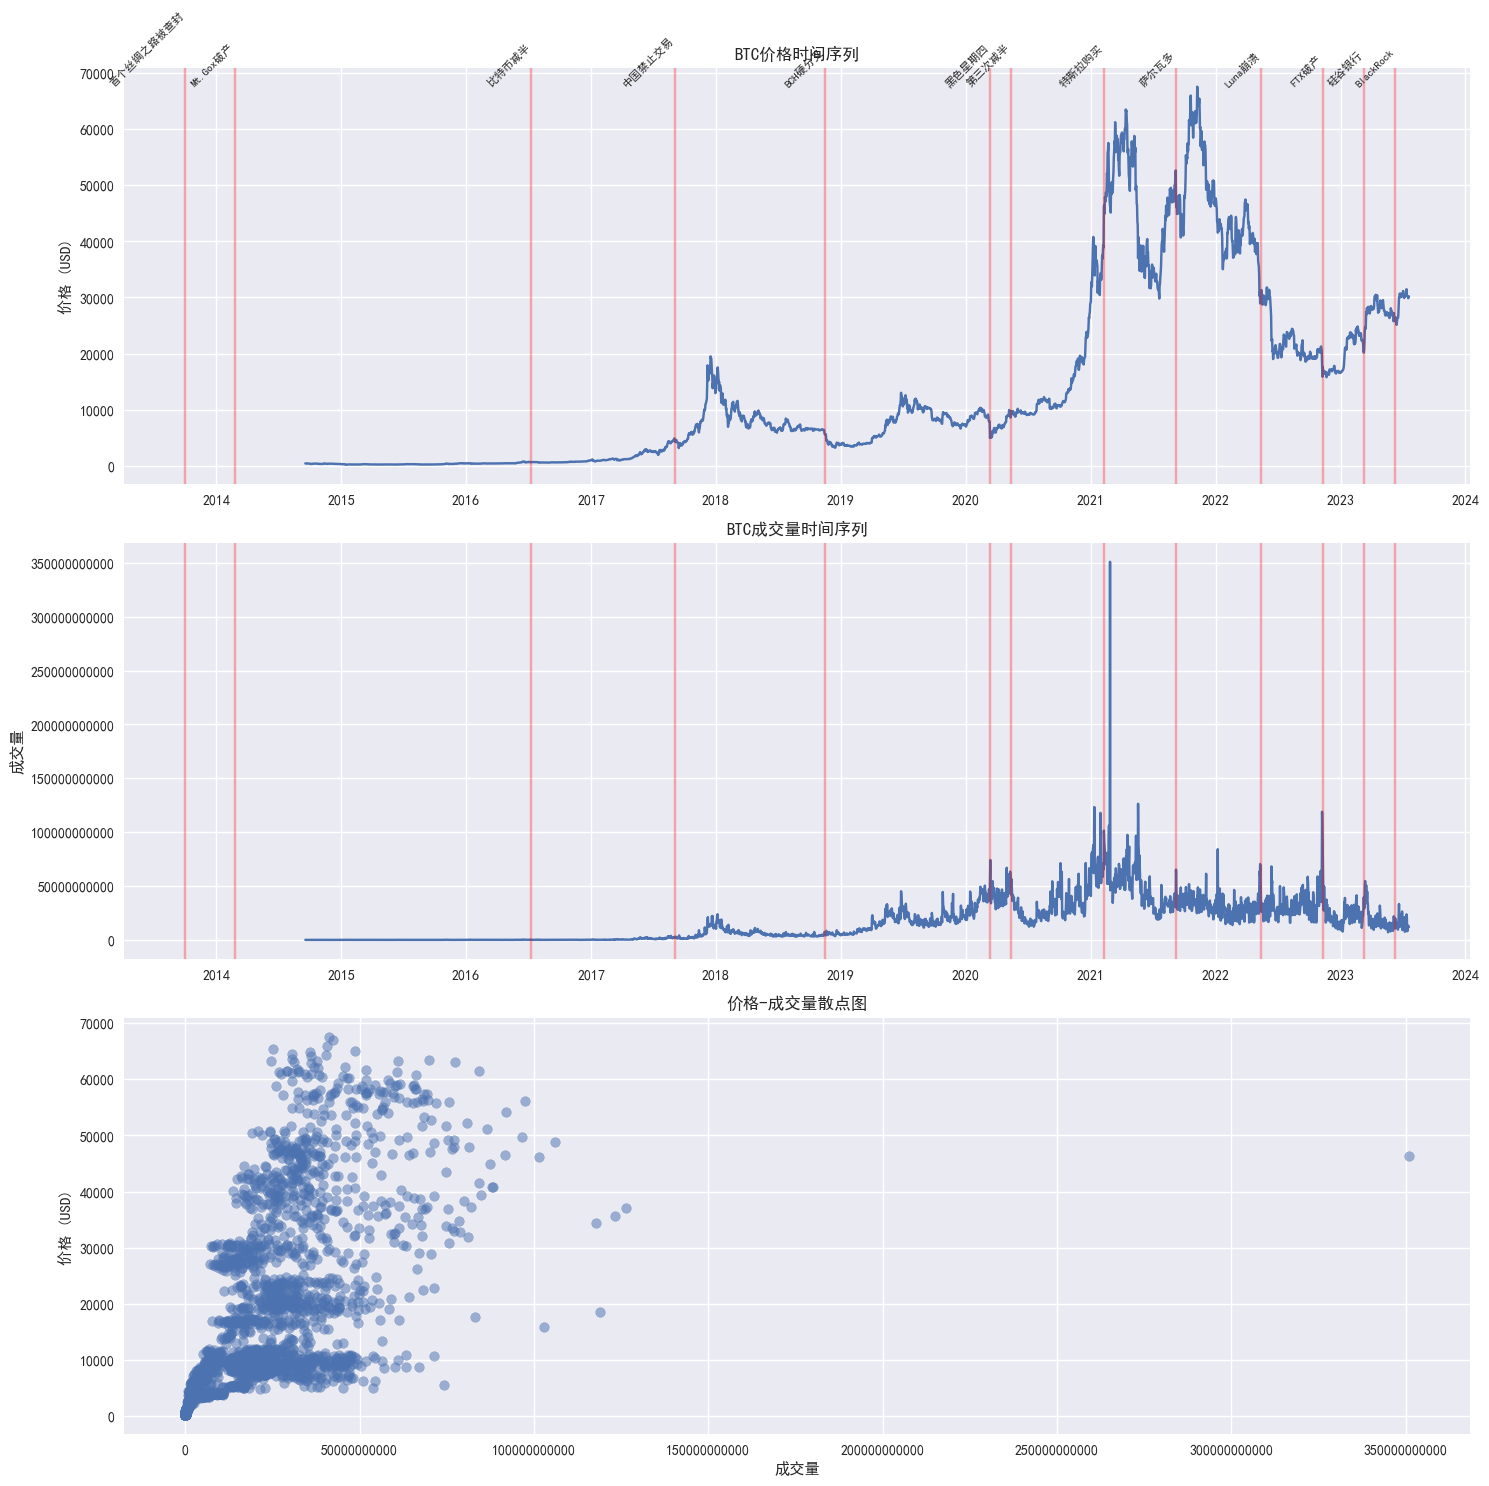


执行平稳性检验...

平稳性检验结果:

Close:
ADF统计量: -1.5406
p值: 0.5133
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673

Volume:
ADF统计量: -2.1898
p值: 0.2100
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673

执行Johansen协整检验...

协整检验结果:
特征值: [0.0225096  0.00032843]

迹统计量和临界值:
H0: r <= 0
迹统计量: 74.4823
临界值: [13.4294 15.4943 19.9349]
H0: r <= 1
迹统计量: 1.0593
临界值: [2.7055 3.8415 6.6349]

执行Granger因果检验...

Granger因果检验p值:

价格→交易量:
滞后3期: 0.0263 (显著)
滞后4期: 0.0024 (显著)
滞后5期: 0.0010 (显著)
滞后6期: 0.0000 (显著)

交易量→价格:

估计误差修正模型...

协整方程结果:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5091      0.073    -62.086      0.000      -4.651      -4.367
log_volume     0.5968      0.003    180.385      0.000       0.590       0.603

ECM估计结果:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      


KeyboardInterrupt



In [60]:
import pandas as pd
import numpy as np
from multivariate_analysis import BTCMultivariateAnalysis
from events import events
import warnings
warnings.filterwarnings('ignore')  # 忽略警告信息
def main():
    """主函数"""
    try:
        # 加载数据
        print("加载数据...")
        df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

        # 初始化分析器
        print("初始化分析器...")
        analyzer = BTCMultivariateAnalysis(df, events)

        # 数据预处理
        print("数据预处理...")
        df_processed = analyzer.preprocess_data()

        # 绘制初始分析图
        print("\n绘制原始序列基础分析图...")
        analyzer.plot_initial_analysis()

        # 1. 平稳性检验
        print("\n执行平稳性检验...")
        stationarity_results = analyzer.check_stationarity()
        print("\n平稳性检验结果:")
        for variable, results in stationarity_results.items():
            print(f"\n{variable}:")
            print(f"ADF统计量: {results['adf_statistic']:.4f}")
            print(f"p值: {results['p_value']:.4f}")
            print("临界值:")
            for key, value in results['critical_values'].items():
                print(f"\t{key}: {value:.4f}")

        # 2. 协整检验
        print("\n执行Johansen协整检验...")
        coint_results = analyzer.cointegration_test()
        if coint_results:
            print("\n协整检验结果:")
            print(f"特征值: {coint_results['eigenvalues']}")
            print("\n迹统计量和临界值:")
            for i, (trace, cvs) in enumerate(zip(coint_results['trace_stat'],
                                                 coint_results['crit_vals'])):
                print(f"H0: r <= {i}")
                print(f"迹统计量: {trace:.4f}")
                print(f"临界值: {cvs}")

        # 3. Granger因果检验
        print("\n执行Granger因果检验...")
        causality_results = analyzer.granger_causality_test(maxlag=5)
        if causality_results:
            print("\nGranger因果检验p值:")
            print("\n价格→交易量:")
            for lag, pvalue in causality_results['price_to_volume'].items():
                if pvalue < 0.05:
                    print(f"滞后{lag}期: {pvalue:.4f} (显著)")
            print("\n交易量→价格:")
            for lag, pvalue in causality_results['volume_to_price'].items():
                if pvalue < 0.05:
                    print(f"滞后{lag}期: {pvalue:.4f} (显著)")

        # 4. 误差修正模型
        print("\n估计误差修正模型...")
        ecm_results = analyzer.estimate_ecm()
        if ecm_results:
            print("\n协整方程结果:")
            print(ecm_results['coint_eq'].summary().tables[1])
            print("\nECM估计结果:")
            print(ecm_results['ecm'].summary().tables[1])

        # 5. 干预分析
        print("\n执行干预分析...")
        intervention_results = analyzer.intervention_analysis_with_arimax()
        if intervention_results:
            print("\n干预分析结果:")
            model = intervention_results['model']
            print("\nARIMAX模型摘要:")
            print(model.summary().tables[1])

            print("\n重大事件影响分析:")
            effects = intervention_results['intervention_effects']
            for event, effect in effects.items():
                if abs(effect['p_value']) < 0.05:
                    event_name = event.split('_', 1)[1]
                    print(f"\n事件: {event_name}")
                    print(f"影响系数: {effect['coefficient']:.4f}")
                    print(f"显著性(p值): {effect['p_value']:.4f}")
                    print(f"95%置信区间: [{effect['conf_int_lower']:.4f}, {effect['conf_int_upper']:.4f}]")

            # 绘制干预效果图
            print("\n绘制干预效果分析图...")
            analyzer.plot_intervention_effects(intervention_results)

    except Exception as e:
        print(f"\n分析过程中出现错误: {str(e)}")
        raise

if __name__ == "__main__":
    main()